In [1]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

from config import *

FEA_DIR = "/Users/timberzhang/Documents/Documents/2024-JustWatch/OutputRecord/GreedyNonScale"
# FEA_DIR = "/Users/timberzhang/Documents/Documents/2024-JustWatch/OutputRecord/GreedyNonScaleV1"
NUM_CLASSES=3
# VIDEO_TYPES=["w", "1", "N_L"]
# VIDEO_TYPES=["w", "1", "R_S", "A_S"]
# VIDEO_TYPES=["p", "1", "N_L"]
# VIDEO_TYPES=["p", "1", "R_S"]
drop_p = ["24071617_AD", "24071721_AD", "24070906_AD", "24070907_AD", "24071618_AD", "24070901_AD", "24071512_AD"]

# Prepare Data

In [2]:
people_list = os.listdir(FEA_DIR)
people_list = list(filter(lambda x: "." not in x, people_list))
people_list

['24071616_AD',
 '24090310_AD',
 '24071008_AD',
 '24082906_AD',
 '24082803_AD',
 '24072023_AD',
 '24071617_AD',
 '24090311_AD',
 '24071009_AD',
 '24070901_AD',
 '24071618_AD',
 '24070905_AD',
 '24082302_AD',
 '24071619_AD',
 '24072825_AD',
 '24070904_AD',
 '24070907_AD',
 '24071010_AD',
 '24090308_AD',
 '24071011_AD',
 '24070902_AD',
 '24090309_AD',
 '24090513_AD',
 '24072926_AD',
 '24090412_AD',
 '24070906_AD',
 '24082301_AD',
 '24071513_AD',
 '24083007_AD',
 '24082904_AD',
 '24071721_AD',
 '24071512_AD',
 '24071615_AD',
 '24082905_AD',
 'Test_AD']

In [3]:
people_fea = {}
for _p in people_list:
    if _p in drop_p: continue
    people_fea[_p] = pd.read_csv(os.path.join(f"{FEA_DIR}/{_p}", "features.csv"), index_col=0)

In [4]:
people_stat = pd.read_excel(os.path.join(DATA_DIR, "ParticipantsInfo.xlsx"), )
people_stat

,Label,No.,Name,Gender,Age,Edu,IsBall,AV45,MMSE,MOCA,ADL,CDR,PicoFile,IsVideo,Contact,ScaleTime,VideoTime
0,HC,24070901,王霖霞,女,70,高中,1.0,-,28,27,20,-,24070901_AD,1,NaN,NaN,NaN
1,HC,24070902,桑秀平,女,64,小学,0.0,-,26,19,20,-,24070902_AD,1,NaN,NaN,NaN
2,HC,24070904,李杏英,女,62,小学,0.0,-,29,20,20,-,24070904_AD,1,NaN,NaN,NaN
3,HC,24070905,朱小汝,女,64,初中,1.0,-,28,20,20,-,24070905_AD,1,NaN,NaN,NaN
4,HC,24070906,宋玉花,女,56,初中,0.0,-,28,24,20,-,24070906_AD,1,NaN,NaN,NaN
5,HC,24070907,刘亚珍,女,60,初中,1.0,-,29,23,20,-,24070907_AD,1,NaN,NaN,NaN
6,HC,24071008,焦秀枝,女,60,初中,0.0,-,29,25,20,-,24071008_AD,1,NaN,NaN,NaN
7,HC,24071009,徐义华,女,64,高中,1.0,-,30,24,20,-,24071009_AD,1,NaN,NaN,NaN
8,HC,24071010,李国锁,男,65,初中,0.0,-,26,23,20,-,24071010_AD,1,NaN,NaN,NaN
9,HC,24071011,董帮春,男,60,初中,0.0,-,30,24,20,-,24071011_AD,1,NaN,NaN,NaN


In [5]:
whole_fea_list = ["MatchRoundRatio",]
# whole_fea_list = ["Player1AttentionRatio","Player2AttentionRatio","Player1MinToCircle","Player2MinToCircle","MatchRoundRatio",]
saccade_fea_list = ["SaccadeSpeed_Mean","SaccadeSpeed_Max","SaccadeSpeed_Std","SaccadeAngel_Mean","SaccadeAngel_Max","SaccadeAngel_Std","SaccadeDelay","SaccadeDelayPercent","TrajectoryDTW"]

In [6]:
#################
# For Version 1 #
#################

""" 
video_type: 
    [] => all
    p => pingpang
    w => tennis
    1 => first watch
    2 => mutiple watch
    N => no label
    R_S => random shining
    A_S => all shining
    R_A => random arrow
    A_A => all arrow
""" 
def StatsFeatures_V1(all_people_fea:dict, all_people_stat:pd.DataFrame, fea_list:list, video_types:list[str], num_classes=3):
    if num_classes==3:
        diag_map ={
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 2,
            "moderateAD" : 2,
        }
    else:
        diag_map ={
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 1,
            "moderateAD" : 1,
        } 

    res={}
    for _p in all_people_fea.keys():
        video_list = all_people_fea[_p].index.to_list()
        _label_video_list = []
        for _v_t in video_types:
            if _v_t=="p":
                _v_ids = list(filter(lambda x:x.startswith("p"), all_people_fea[_p].index))
            elif _v_t=="w":
                _v_ids = list(filter(lambda x:x.startswith("w"), all_people_fea[_p].index))
            elif _v_t=="1":
                _v_ids = list(filter(lambda x: not ((x.split("-")[0].endswith("_2")) or (x.split("-")[0].endswith("_3")) or (x.split("-")[0].endswith("_4"))), all_people_fea[_p].index))
            elif _v_t=="2":
                _v_ids = list(filter(lambda x: (x.split("-")[0].endswith("_2")) or (x.split("-")[0].endswith("_3")) or (x.split("-")[0].endswith("_4")), all_people_fea[_p].index))
            elif _v_t=="N_L":
                _v_ids = list(filter(lambda x: not (("_S" in x.split("-")[0]) or ("_A" in x.split("-")[0])), all_people_fea[_p].index))
            elif _v_t=="R_S":
                _label_video_list += list(filter(lambda x: "R_S" in x.split("-")[0], all_people_fea[_p].index))
            elif _v_t=="A_S":
                _label_video_list += list(filter(lambda x: "A_S" in x.split("-")[0], all_people_fea[_p].index))
            elif _v_t=="R_A":
                _label_video_list += list(filter(lambda x: "R_A" in x.split("-")[0], all_people_fea[_p].index))
            elif _v_t=="A_A":
                _label_video_list += list(filter(lambda x: "A_A" in x.split("-")[0], all_people_fea[_p].index))
            else:
                _v_ids = list(all_people_fea[_p].index)
            
            video_list = list(set(video_list).intersection(set(_v_ids)))
        if _label_video_list:
            video_list = list(set(video_list).intersection(set(_label_video_list)))
            
        # print(_p)
        # print(video_list)
        # print(len(video_list))
        # print(set([i.split("-")[0] for i in video_list]))
        # print(len(set([i.split("-")[0] for i in video_list])))
        # print(set(["_".join(i.split("_")[:-3]) for i in video_list]))
        # print(len(set(["_".join(i.split("_")[:-3]) for i in video_list])))

        temp_df:pd.DataFrame = all_people_fea[_p].loc[video_list, fea_list]
        mean_val = temp_df.mean(skipna=True)
        mean_val.index = [i+"_Mean" for i in mean_val.index]
        std_val = temp_df.std(skipna=True)
        std_val.index = [i+"_Std" for i in std_val.index]
        max_val = temp_df.max(skipna=True)
        max_val.index = [i+"_Max" for i in max_val.index]
        min_val = temp_df.min(skipna=True)
        min_val.index = [i+"_Min" for i in min_val.index]
        
        try:
            _diag = all_people_stat[all_people_stat["PicoFile"]==_p]["Label"].values[0]
        except:
            continue
        else:
            res[_p] = {
                **mean_val.to_dict(),
                **std_val.to_dict(),
                **max_val.to_dict(),
                **min_val.to_dict(),
            }
            res[_p]["label"] = diag_map[_diag]

    res = pd.DataFrame(res).T.astype(np.float32)
    if num_classes==3:
        res["diag"] = res["label"].map({
            0:"HC",
            1:"MCI",
            2:"Mild-AD",
        })
    else:
        res["diag"] = res["label"].map({
            0:"HC",
            1:"PS",
        })
        
    return res

In [7]:
# features_df = StatsFeatures_V1(
#         all_people_fea=people_fea,
#         all_people_stat=people_stat,
#         fea_list=whole_fea_list+saccade_fea_list,
#         video_types=["w", "1", "R_S", "A_S"],
#         num_classes=NUM_CLASSES
#     )

In [8]:
def StatsFeatures(all_people_fea:dict, all_people_stat:pd.DataFrame, fea_list:list, session:list=[0], ball:str="p", number:str="all", twice=0, num_classes=3):
    assert (number in ["f", "b", "all"]), "input number like \"f\" first 2, \"b\" last 2, \"all\" all number"
    if num_classes==3:
        diag_map ={
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 2,
            "moderateAD" : 2,
        }
    else:
        diag_map ={
            "HC" : 0,
            "MCI" : 1,
            "mildAD" : 1,
            "moderateAD" : 1,
        } 

    res={}
    for _p in all_people_fea.keys():
        _ball_list = list(filter(lambda x:x.startswith(ball), all_people_fea[_p].index))

        _session_list = []
        for _v_s in session:
            _v_ids = list(filter(lambda x: x.split("-")[0].split("_")[-3]==str(_v_s), all_people_fea[_p].index))
            _session_list = list(set(_session_list).union(set(_v_ids)))

        _number_list = []
        if number=="f":
            _number_list = list(filter(lambda x: (x.split("-")[0].split("_")[-2]=="0") or (x.split("-")[0].split("_")[-2]=="1"), all_people_fea[_p].index))
        elif number=="b":
            _number_list = list(filter(lambda x: (x.split("-")[0].split("_")[-2]=="2") or (x.split("-")[0].split("_")[-2]=="3"), all_people_fea[_p].index))
        else:
            _number_list = _session_list
        video_list = list(set(_session_list).intersection(set(_number_list)))
        video_list = list(set(video_list).intersection(set(_ball_list)))

        if twice==2:
            video_list = list(filter(lambda x: not x.split("-")[0].endswith("_1"), video_list))
        elif twice==1:
            video_list = list(filter(lambda x: x.split("-")[0].endswith("_1"), video_list))
        else:
            video_list = video_list
            
        # print(_p)
        # print(video_list)
        # print(len(video_list))
        # print(set(["_".join(i.split("_")[:-3]) for i in video_list]))
        # print(len(set(["_".join(i.split("_")[:-3]) for i in video_list])))

        temp_df:pd.DataFrame = all_people_fea[_p].loc[video_list, fea_list]
        mean_val = temp_df.mean(skipna=True)
        mean_val.index = [i+"_Mean" for i in mean_val.index]
        std_val = temp_df.std(skipna=True)
        std_val.index = [i+"_Std" for i in std_val.index]
        max_val = temp_df.max(skipna=True)
        max_val.index = [i+"_Max" for i in max_val.index]
        min_val = temp_df.min(skipna=True)
        min_val.index = [i+"_Min" for i in min_val.index]
        
        try:
            _diag = all_people_stat[all_people_stat["PicoFile"]==_p]["Label"].values[0]
        except:
            continue
        else:
            res[_p] = {
                **mean_val.to_dict(),
                **std_val.to_dict(),
                **max_val.to_dict(),
                **min_val.to_dict(),
            }
            res[_p]["label"] = diag_map[_diag]

    res = pd.DataFrame(res).T.astype(np.float32)
    if num_classes==3:
        res["diag"] = res["label"].map({
            0:"HC",
            1:"MCI",
            2:"Mild-AD",
        })
    else:
        res["diag"] = res["label"].map({
            0:"HC",
            1:"PS",
        })
        
    return res

In [9]:
features_df = StatsFeatures(
        all_people_fea=people_fea,
        all_people_stat=people_stat,
        fea_list=whole_fea_list+saccade_fea_list,
        session=[1],
        ball="w",
        number="all",
        twice=1,
        num_classes=NUM_CLASSES
    )

# Features Statastic

In [10]:
from scipy.stats import shapiro

if_norm = {}
for key in features_df.columns:
    if key=="diag" or key=="label": continue
    SW_test = shapiro(features_df.loc[:,key])[1]
    # print("Group {}'s \tShapiro—Wilk test P-Value: \t{}".format(key,SW_test))
    if_norm[key] = (True if SW_test >0.05 else False)

In [11]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu, wilcoxon, f_oneway, kruskal

def TTest(_input, _col, label_col):
    group1 = _input[_input.loc[:, label_col] == 0].loc[:, _col]
    group2 = _input[_input.loc[:, label_col] == 1].loc[:, _col]
    t_statistic, p_value = ttest_ind(group1, group2)
    return p_value


def UTest(_input, _col, label_col):
    group1 = _input[_input.loc[:, label_col] == 0].loc[:, _col]
    group2 = _input[_input.loc[:, label_col] == 1].loc[:, _col]
    u_statistic, p_value = mannwhitneyu(group1, group2)
    return p_value


def AnovaTest(_input, _col, label_col):
    groups = []
    for i in _input[label_col].unique():
        groups.append(_input[_input.loc[:, label_col] == i].loc[:, _col])
    u_statistic, p_value = f_oneway(*groups)
    return p_value

def KWTest(_input, _col, label_col):
    groups = []
    for i in _input[label_col].unique():
        groups.append(_input[_input.loc[:, label_col] == i].loc[:, _col])

    u_statistic, p_value = kruskal(*groups)
    return p_value

In [12]:
para_pvalue = {}

if features_df["label"].value_counts().shape[0]==2:
    for key in features_df.columns:
        if key=="diag" or key=="label": continue
        if if_norm[key]:
            p_value = TTest(features_df, key, label_col='label')
        else:
            p_value = UTest(features_df, key, label_col='label')
        para_pvalue[key] = {
            "p-value": p_value,
            "if_para": True if p_value <= 0.05 else False
        }
else:
    for key in features_df.columns:
        if key=="diag" or key=="label": continue
        if if_norm[key]:
            p_value = AnovaTest(features_df, key, label_col='label')
        else:
            p_value = KWTest(features_df, key, label_col='label')
        para_pvalue[key] = {
            "p-value": p_value,
            "if_para": True if p_value <= 0.05 else False
        }

In [13]:
pt_res = pd.DataFrame(para_pvalue).T.sort_values(by="p-value")

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

custom_palette = ["#00712D", "#FF9100", "#D5ED9F", "#FFFBE6"]
if not os.path.exists("pics"):
    os.mkdir("pics")

In [15]:
features_df[features_df["diag"]=="HC"]

,MatchRoundRatio_Mean,SaccadeSpeed_Mean_Mean,SaccadeSpeed_Max_Mean,SaccadeSpeed_Std_Mean,SaccadeAngel_Mean_Mean,SaccadeAngel_Max_Mean,SaccadeAngel_Std_Mean,SaccadeDelay_Mean,SaccadeDelayPercent_Mean,TrajectoryDTW_Mean,...,SaccadeSpeed_Max_Min,SaccadeSpeed_Std_Min,SaccadeAngel_Mean_Min,SaccadeAngel_Max_Min,SaccadeAngel_Std_Min,SaccadeDelay_Min,SaccadeDelayPercent_Min,TrajectoryDTW_Min,label,diag
24071616_AD,0.969697,40.674088,297.104279,62.514919,0.813482,5.942086,1.250298,683.333313,10.316254,602.346802,...,146.046021,33.121929,0.293277,2.920920,0.662439,100.0,0.714286,236.456512,0.0,HC
24071008_AD,0.952381,63.528748,410.457703,87.538567,1.270575,8.209154,1.750771,1017.727295,14.346404,516.159485,...,179.089554,33.234470,0.353811,3.581791,0.664689,180.0,3.050848,158.116699,0.0,HC
24072023_AD,0.937500,35.664154,327.426483,63.422432,0.713283,6.548530,1.268449,823.200012,11.974736,457.320740,...,129.994461,27.165895,0.327050,2.599889,0.543318,500.0,5.111111,159.627274,0.0,HC
24071009_AD,0.965909,65.331039,424.745209,88.102135,1.306621,8.494904,1.762043,791.692322,11.721075,456.243286,...,114.822716,24.614365,0.491885,2.296454,0.492287,320.0,4.444445,118.930046,0.0,HC
24070905_AD,1.000000,74.515877,752.730286,147.670456,1.490318,15.054605,2.953409,1308.333374,15.295555,499.375580,...,195.039948,48.916920,0.657959,3.900799,0.978338,800.0,9.555555,179.926941,0.0,HC
24071619_AD,0.977273,60.843048,380.485931,78.949043,1.216861,7.609719,1.578981,832.121216,12.975476,580.285156,...,146.677277,33.681538,0.588289,2.933545,0.673631,320.0,6.616541,160.085678,0.0,HC
24072825_AD,0.928571,40.560246,298.051483,64.326416,0.811205,5.961030,1.286528,716.250000,11.339060,522.989685,...,167.257675,34.420513,0.330413,3.345153,0.688410,0.0,0.000000,177.314438,0.0,HC
24070904_AD,0.958333,37.517673,360.090668,69.502419,0.750353,7.201814,1.390048,933.913025,13.497505,441.534424,...,196.793762,31.482716,0.363080,3.935875,0.629654,620.0,7.608696,216.148148,0.0,HC
24071010_AD,0.924603,52.300320,343.639008,71.934082,1.046006,6.872780,1.438682,777.837830,11.314874,508.836243,...,144.589478,28.519676,0.469825,2.891790,0.570394,0.0,0.000000,155.977707,0.0,HC
24071011_AD,0.912879,71.770096,557.185181,112.834366,1.435402,11.143703,2.256687,935.555542,13.785083,677.386414,...,186.670807,45.641136,0.550259,3.733416,0.912823,80.0,1.904762,149.952896,0.0,HC


In [16]:
pt_res

,p-value,if_para
MatchRoundRatio_Min,0.000001,True
MatchRoundRatio_Mean,0.000004,True
TrajectoryDTW_Mean,0.000035,True
SaccadeDelayPercent_Std,0.000356,True
SaccadeAngel_Max_Min,0.007566,True
SaccadeSpeed_Max_Min,0.007566,True
SaccadeSpeed_Mean_Min,0.00826,True
SaccadeAngel_Mean_Min,0.00826,True
TrajectoryDTW_Min,0.008493,True
SaccadeDelayPercent_Min,0.013456,True


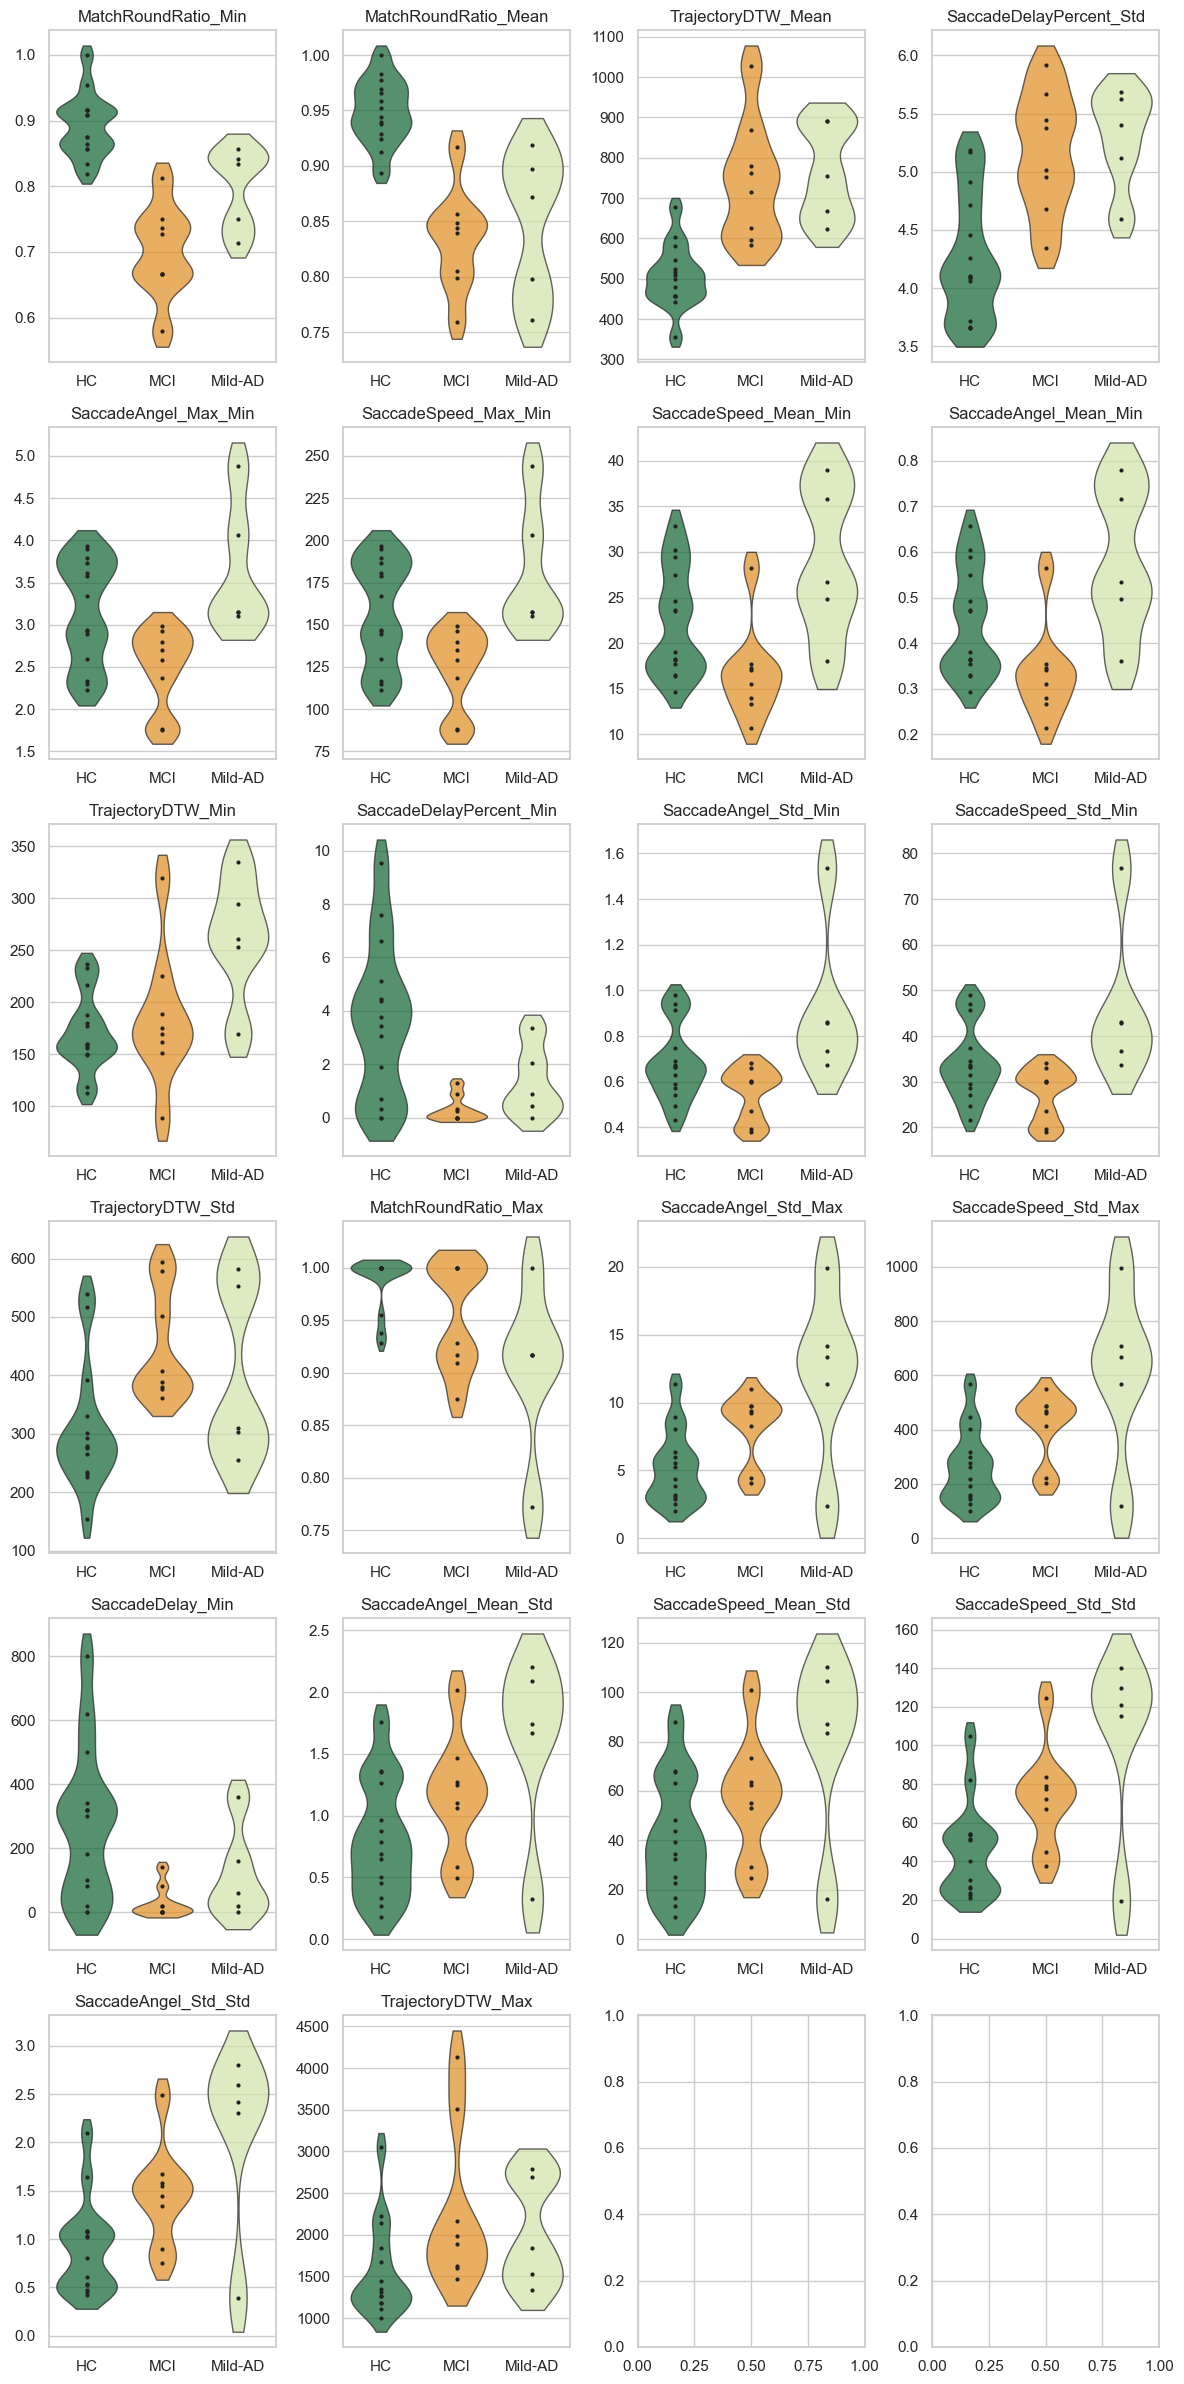

In [28]:
pass_feas = pt_res[pt_res["if_para"]]
_ncols = 4 
_nrows = (pass_feas.shape[0]//_ncols) if (pass_feas.shape[0]%_ncols)==0 else (pass_feas.shape[0]//_ncols)+1

f, axs = plt.subplots(nrows=_nrows, ncols=_ncols, figsize=(3*_ncols, 4*_nrows))
for idx, col in enumerate(pass_feas.index):
    # col = "MatchRoundRatio_Mean"

    # Set up the matplotlib figure
    # Draw a violinplot with a narrower bandwidth than the default
    try:
        temp_ax = axs[idx//_ncols, idx%_ncols]
    except:
        temp_ax = axs[idx%_ncols]

    sns.violinplot(
            data=features_df.loc[:, [col, "diag"]], 
            palette=custom_palette,
            alpha=0.7,
            bw_adjust=.5, 
            cut=1, 
            linewidth=1, 
            x="diag", 
            y=col, 
            inner="point", 
            ax=temp_ax
        )
    # sns.boxplot(
    #         data=features_df.loc[:, [col, "diag"]], 
    #         palette=custom_palette,
    #         linewidth=1, 
    #         x="diag", 
    #         y=col, 
    #         ax=temp_ax
    #     )
    
    temp_ax.set_xlabel("")
    temp_ax.set_ylabel("")
    temp_ax.set_title(col)
    # sns.despine(left=True, bottom=True)
plt.tight_layout()

# plt.savefig("pics/sig_features_{}_{}.png".format("_".join(VIDEO_TYPES), NUM_CLASSES), dpi=200)

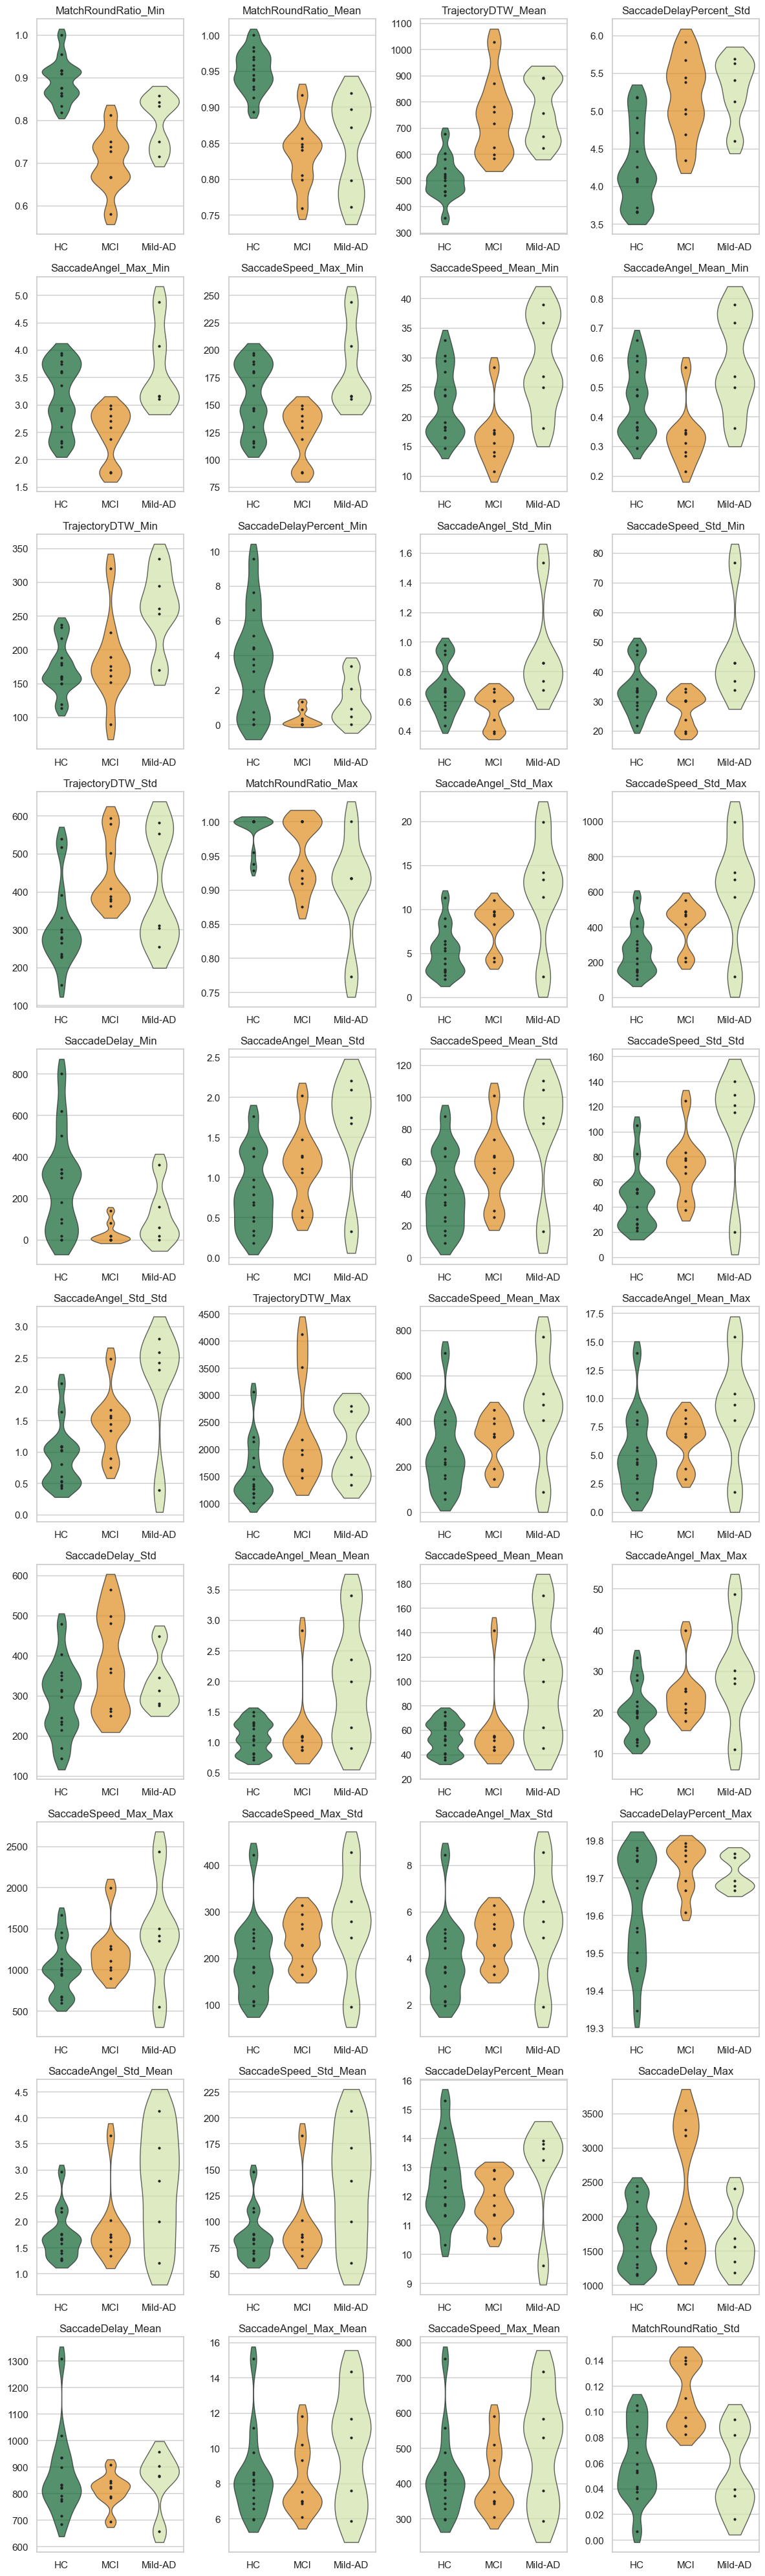

In [29]:
pass_feas = pt_res
_ncols = 4
_nrows = (pass_feas.shape[0]//_ncols) if (pass_feas.shape[0]%_ncols)==0 else (pass_feas.shape[0]//_ncols)+1

f, axs = plt.subplots(nrows=_nrows, ncols=_ncols, figsize=(3*_ncols, 4*_nrows))
for idx, col in enumerate(pass_feas.index):
    # col = "MatchRoundRatio_Mean"

    # Set up the matplotlib figure
    # Draw a violinplot with a narrower bandwidth than the default
    temp_ax = axs[idx//_ncols, idx%_ncols]
    sns.violinplot(
            data=features_df.loc[:, [col, "diag"]], 
            palette=custom_palette,
            alpha=0.7,
            bw_adjust=.5, 
            cut=1, 
            linewidth=1, 
            x="diag", 
            y=col, 
            inner="point", 
            ax=temp_ax
        )
    # sns.boxplot(
    #         data=features_df.loc[:, [col, "diag"]], 
    #         palette=custom_palette,
    #         linewidth=1, 
    #         x="diag", 
    #         y=col, 
    #         ax=temp_ax
    #     )
    
    temp_ax.set_xlabel("")
    temp_ax.set_ylabel("")
    temp_ax.set_title(col)
    # sns.despine(left=True, bottom=True)
plt.tight_layout()

# plt.savefig("pics/features_{}_{}.png".format("_".join(VIDEO_TYPES), NUM_CLASSES), dpi=200)

# Machine Learning

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedKFold

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, auc, roc_curve



data_indices = features_df.index.to_list()
fea_list = pt_res[pt_res["if_para"]].index.to_list()
final_result = {}

rkf = RepeatedKFold(n_splits=5, n_repeats=6)
X = features_df[fea_list]
y = features_df['label']

## Two Classes

In [20]:
if NUM_CLASSES==2:
    final_result['overall'] = {}
    final_result['overall']['acc'] = []
    final_result['overall']['pre'] = []
    final_result['overall']['recall'] = []
    final_result['overall']['f1'] = []
    final_result['overall']['fpr'] = []
    final_result['overall']['tpr'] = []
    final_result['overall']['thresholds'] = []
    final_result['overall']['auc'] = []
    final_result['overall']['test_index'] = []
    final_result['overall']['trues'] = []
    final_result['overall']['preds'] = []
    final_result['overall']['preds_porb'] = []

    for i, (train_index, test_index) in enumerate(rkf.split(X)):
        final_result['overall']['test_index'].append(test_index)

        # cls = RandomForestClassifier(20, max_depth=5)
        cls = RandomForestClassifier(n_estimators=5, max_depth=3)
        # cls = AdaBoostClassifier(n_estimators=5, learning_rate=0.75)
        # cls = SVC(C=0.75, kernel='linear')
        # cls = SVC(C=0.75, kernel='rbf')
        x_train, y_train = features_df.iloc[train_index][fea_list], features_df.iloc[train_index]['label']
        x_test, y_test = features_df.iloc[test_index][fea_list], features_df.iloc[test_index]['label']
        cls.fit(X=x_train, y=y_train)

        pred = cls.predict(x_test)
        final_result['overall']['acc'].append(accuracy_score(y_test, pred))
        final_result['overall']['pre'].append(precision_score(y_test, pred))
        final_result['overall']['recall'].append(recall_score(y_test, pred))
        final_result['overall']['f1'].append(f1_score(y_test, pred))
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        final_result['overall']['fpr'].append(fpr)
        final_result['overall']['tpr'].append(tpr)
        final_result['overall']['thresholds'].append(thresholds)
        final_result['overall']['auc'].append(auc(fpr, tpr))

        final_result['overall']['trues'].append(y_test.to_list())
        final_result['overall']['preds'].append(pred.tolist())
        final_result['overall']['preds_porb'].append(cls.predict_proba(x_test))

In [21]:
if NUM_CLASSES==3:

    final_result['overall'] = {}
    final_result['overall']['acc'] = []
    final_result['overall']['micro_pre'] = []
    final_result['overall']['micro_recall'] = []
    final_result['overall']['micro_f1'] = []
    final_result['overall']['macro_pre'] = []
    final_result['overall']['macro_recall'] = []
    final_result['overall']['macro_f1'] = []
    final_result['overall']['test_index'] = []
    final_result['overall']['trues'] = []
    final_result['overall']['preds'] = []
    final_result['overall']['preds_porb'] = []

    for i, (train_index, test_index) in enumerate(rkf.split(X)):
        final_result['overall']['test_index'].append(test_index)

        # cls = RandomForestClassifier(n_estimators=5, max_depth=5)
        cls = AdaBoostClassifier(n_estimators=5, learning_rate=0.9)
        # cls = SVC(C=0.75, kernel='linear')
        # cls = SVC(C=0.75, kernel='rbf')
        x_train, y_train = features_df.iloc[train_index][fea_list], features_df.iloc[train_index]['label']
        x_test, y_test = features_df.iloc[test_index][fea_list], features_df.iloc[test_index]['label']
        cls.fit(X=x_train, y=y_train)

        pred = cls.predict(x_test)
        final_result['overall']['acc'].append(accuracy_score(y_test, pred))
        final_result['overall']['micro_pre'].append(precision_score(y_test, pred, average='micro'))
        final_result['overall']['micro_recall'].append(recall_score(y_test, pred, average='micro'))
        final_result['overall']['micro_f1'].append(f1_score(y_test, pred, average='micro'))
        final_result['overall']['macro_pre'].append(precision_score(y_test, pred, average='macro'))
        final_result['overall']['macro_recall'].append(recall_score(y_test, pred, average='macro'))
        final_result['overall']['macro_f1'].append(f1_score(y_test, pred, average='macro'))

        final_result['overall']['trues'].append(y_test.to_list())
        final_result['overall']['preds'].append(pred.tolist())
        final_result['overall']['preds_porb'].append(cls.predict_proba(x_test))

In [22]:
for key in final_result['overall'].keys():
    if key in ['fpr', 'tpr', 'thresholds', 'test_index', 'trues', 'preds', 'preds_porb']:
        continue
    print(key, np.mean(final_result['overall'][key]))

acc 0.6711111111111111
micro_pre 0.6711111111111111
micro_recall 0.6711111111111111
micro_f1 0.6711111111111111
macro_pre 0.5990740740740741
macro_recall 0.5888888888888889
macro_f1 0.5642063492063493


In [23]:
pd.DataFrame(final_result["overall"])

,acc,micro_pre,micro_recall,micro_f1,macro_pre,macro_recall,macro_f1,test_index,trues,preds,preds_porb
0,0.666667,0.666667,0.666667,0.666667,0.583333,0.416667,0.472222,"[1, 2, 15, 17, 22, 25]","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 2.0, 0.0, 0.0, 0.0]","[[1.8890649810342247e-08, 0.9999978320670698, ..."
1,0.500000,0.500000,0.500000,0.500000,0.611111,0.500000,0.522222,"[4, 8, 10, 14, 20, 23]","[1.0, 0.0, 0.0, 1.0, 2.0, 2.0]","[1.0, 2.0, 0.0, 2.0, 0.0, 2.0]","[[5.055186519556465e-10, 0.9999999946938227, 4..."
2,0.800000,0.800000,0.800000,0.800000,0.888889,0.833333,0.822222,"[3, 7, 12, 18, 24]","[2.0, 0.0, 0.0, 1.0, 2.0]","[2.0, 0.0, 0.0, 1.0, 0.0]","[[5.413818397483159e-13, 0.0009068955463328958..."
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,"[0, 5, 6, 9, 13]","[0.0, 0.0, 1.0, 1.0, 0.0]","[0.0, 0.0, 1.0, 1.0, 0.0]","[[0.6853917829972778, 0.31460811840800434, 9.8..."
4,0.800000,0.800000,0.800000,0.800000,0.583333,0.666667,0.619048,"[11, 16, 19, 21, 26]","[0.0, 0.0, 0.0, 2.0, 1.0]","[0.0, 0.0, 0.0, 0.0, 1.0]","[[0.9999995269675973, 4.2106988108782406e-13, ..."
5,0.166667,0.166667,0.166667,0.166667,0.083333,0.333333,0.133333,"[0, 6, 14, 17, 18, 24]","[0.0, 1.0, 1.0, 1.0, 1.0, 2.0]","[0.0, 2.0, 0.0, 2.0, 0.0, 0.0]","[[0.9999815960451809, 1.8352509105956285e-05, ..."
6,0.500000,0.500000,0.500000,0.500000,0.200000,0.250000,0.222222,"[8, 12, 20, 21, 22, 25]","[0.0, 0.0, 2.0, 2.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[[0.9999999564967784, 3.648684098143576e-13, 4..."
7,0.800000,0.800000,0.800000,0.800000,0.666667,0.555556,0.600000,"[1, 2, 4, 15, 19]","[1.0, 0.0, 1.0, 0.0, 0.0]","[1.0, 0.0, 1.0, 2.0, 0.0]","[[7.905753471508143e-09, 0.99999592076022, 4.0..."
8,0.600000,0.600000,0.600000,0.600000,0.333333,0.333333,0.333333,"[3, 5, 7, 11, 23]","[2.0, 0.0, 0.0, 0.0, 2.0]","[1.0, 0.0, 0.0, 0.0, 1.0]","[[9.838651159961625e-06, 0.9999901284748899, 3..."
9,0.800000,0.800000,0.800000,0.800000,0.666667,0.555556,0.600000,"[9, 10, 13, 16, 26]","[1.0, 0.0, 0.0, 0.0, 1.0]","[1.0, 0.0, 0.0, 2.0, 1.0]","[[0.0008262797529983762, 0.9991725956403609, 1..."


Text(59.5, 0.5, 'Target')

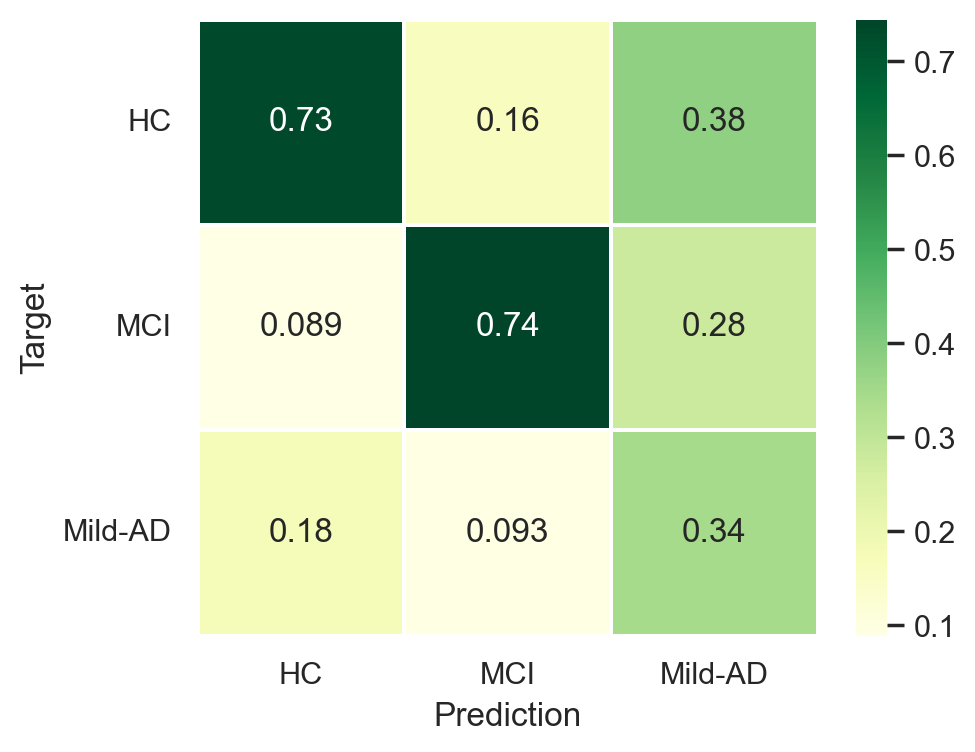

In [24]:
from sklearn.metrics import confusion_matrix

trues = [item for sublist in final_result["overall"]["trues"] for item in sublist]
preds = [item for sublist in final_result["overall"]["preds"] for item in sublist]
if NUM_CLASSES==2:
    preds_prob = [item[1] for sublist in final_result["overall"]["preds_porb"] for item in sublist]
else:
    preds_prob = [item for sublist in final_result["overall"]["preds_porb"] for item in sublist]
f,ax = plt.subplots(figsize=(5,4), dpi=200)
C2 = confusion_matrix(trues, preds, labels=[0,1,2] if NUM_CLASSES==3 else [0,1])
# C2 = C2 / len(trues)
C2 = C2 / C2.sum(axis=0)

sns.heatmap(C2, annot=True, ax=ax, cmap="YlGn", linewidth=.8) 

if NUM_CLASSES==3:
    ax.set_yticklabels(['HC', 'MCI', 'Mild-AD'])
    ax.set_xticklabels(['HC', 'MCI', 'Mild-AD'])
else:
    ax.set_yticklabels(['HC', 'PS'])
    ax.set_xticklabels(['HC', 'PS'])

plt.setp(ax.get_yticklabels(), rotation=0)
ax.set_xlabel('Prediction')
ax.set_ylabel('Target')

In [25]:
from sklearn.metrics import roc_auc_score
if NUM_CLASSES==3:
    print("Macro One-vs-Rest AUC", roc_auc_score(trues, preds_prob, multi_class="ovr", average="macro"))
    print("Weighted One-vs-Rest AUC", roc_auc_score(trues, preds_prob, multi_class="ovr", average="weighted"))
    print("Macro One-vs-One AUC", roc_auc_score(trues, preds_prob, multi_class="ovo", average="macro"))
    print("Weighted One-vs-One AUC", roc_auc_score(trues, preds_prob, multi_class="ovo", average="weighted"))
else:
    print("AUC", roc_auc_score(trues, preds_prob))

Macro One-vs-Rest AUC 0.7761072687059528
Weighted One-vs-Rest AUC 0.7892914563236201
Macro One-vs-One AUC 0.7618386243386244
Weighted One-vs-One AUC 0.7707497427983538


In [26]:
trues_np = np.array(trues, dtype=np.int16)
trues_onehot = np.zeros((trues_np.size, trues_np.max() + 1))
trues_onehot[np.arange(trues_np.size), trues_np] = 1

preds_np = np.array(preds, dtype=np.int16)
preds_onehot = np.zeros((preds_np.size, preds_np.max() + 1))
preds_onehot[np.arange(preds_np.size), preds_np] = 1

preds_prob_np = np.array(preds_prob)

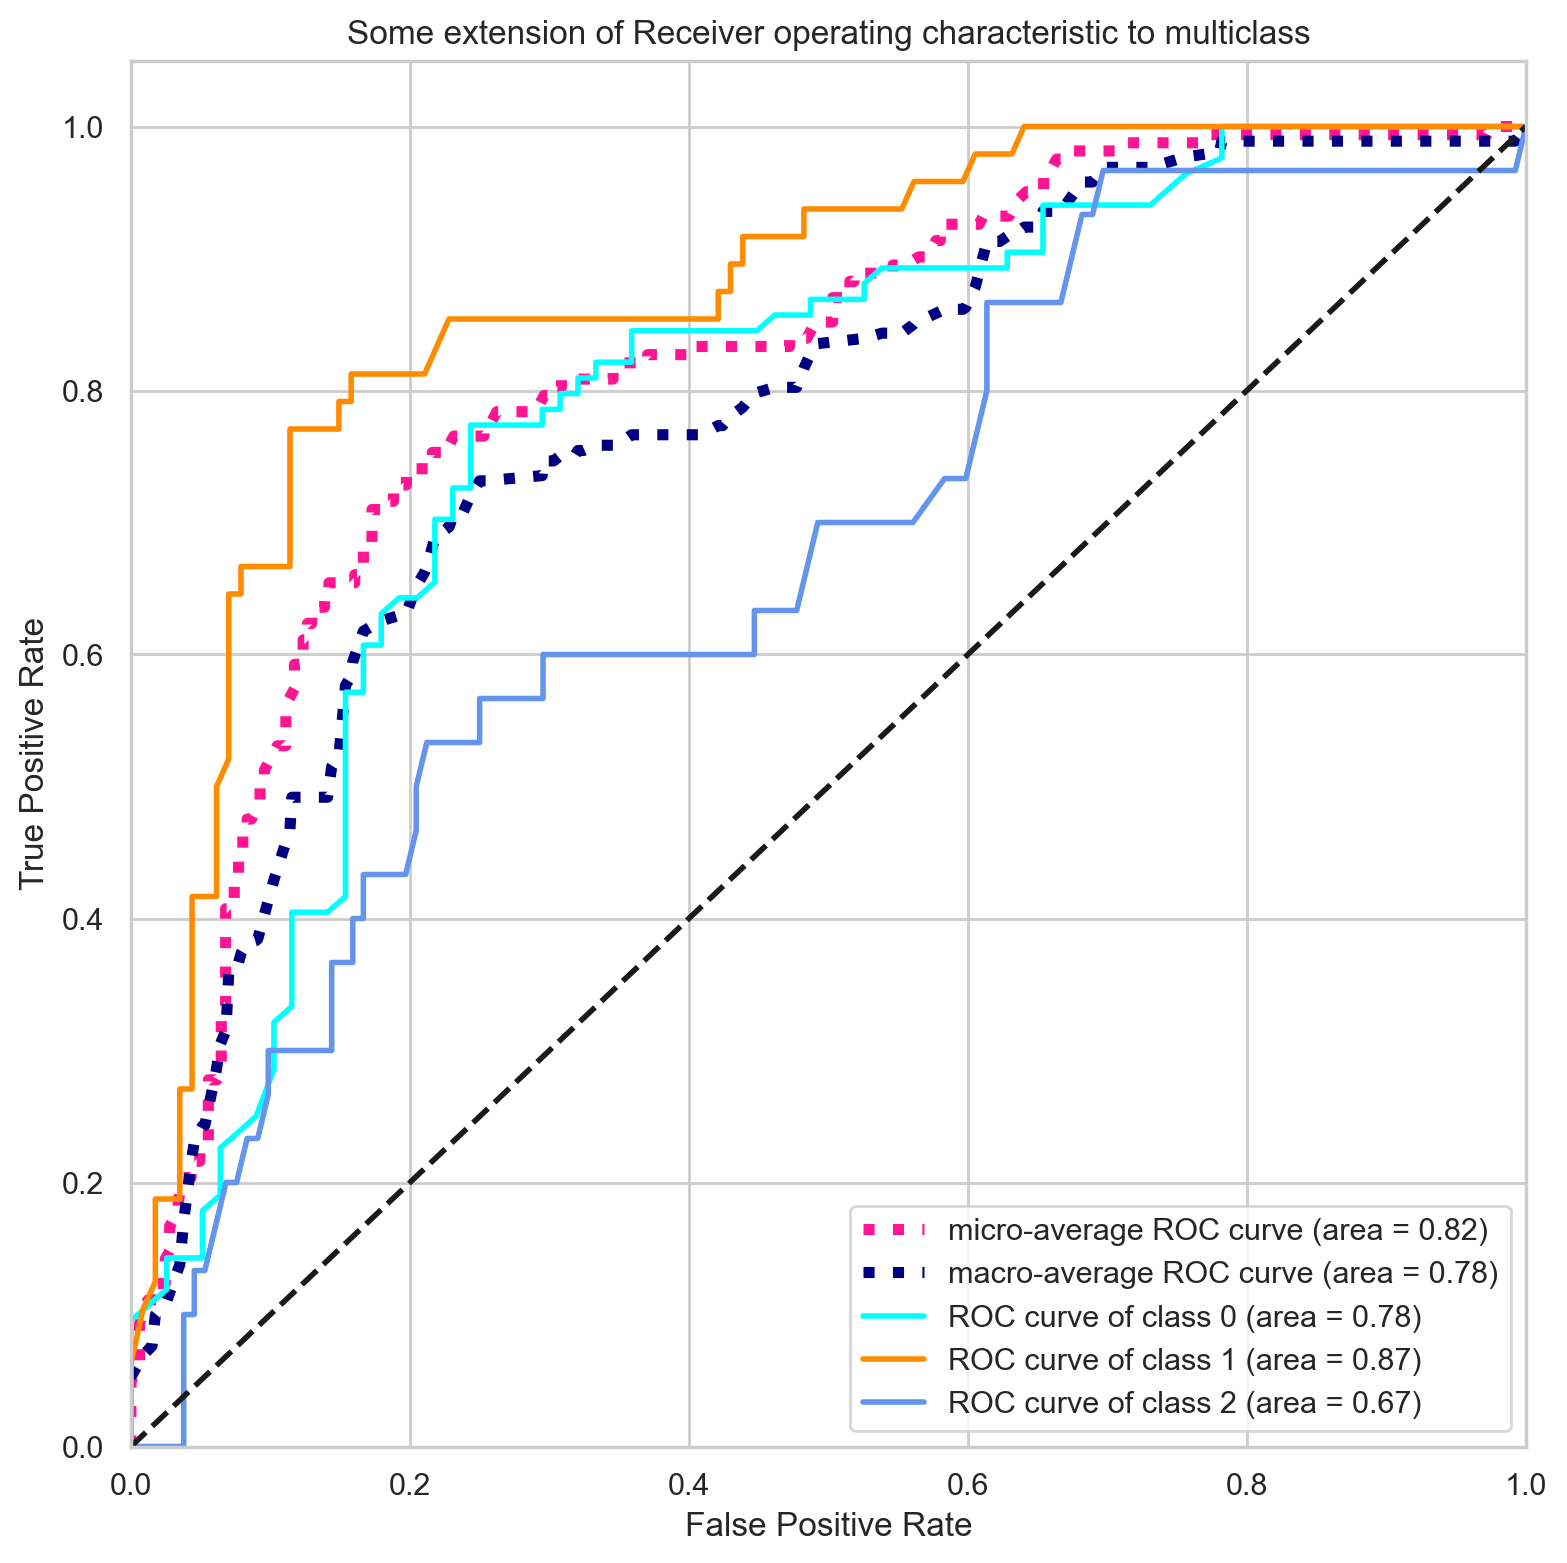

In [27]:
from itertools import cycle
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(NUM_CLASSES):
    fpr[i], tpr[i], _ = roc_curve(trues_onehot[:, i], preds_prob_np[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(trues_onehot.ravel(), preds_prob_np.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(NUM_CLASSES)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(NUM_CLASSES):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= NUM_CLASSES

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(9,9), dpi=200)
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(NUM_CLASSES), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()